## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  46.856974   681.571036  0.474942   6.820670  327.190933
1   2.774370   548.985847  0.974279   6.509597  534.836145
2  26.050858   626.161008  0.403133   5.309573  253.899211
3  17.351484  1290.038196  0.271855  10.138242  351.051050
4   2.576418   429.445786  0.467300   1.901849  200.627676


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9912440	total: 57.3ms	remaining: 57.2s
1:	learn: 0.9809283	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9700308	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9576537	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9464466	total: 59.3ms	remaining: 11.8s
5:	learn: 0.9368369	total: 59.8ms	remaining: 9.91s
6:	learn: 0.9223030	total: 60.3ms	remaining: 8.55s
7:	learn: 0.9093325	total: 60.8ms	remaining: 7.54s
8:	learn: 0.8975035	total: 61.4ms	remaining: 6.76s
9:	learn: 0.8846897	total: 62.1ms	remaining: 6.15s
10:	learn: 0.8732642	total: 62.7ms	remaining: 5.64s
11:	learn: 0.8621730	total: 63.1ms	remaining: 5.2s
12:	learn: 0.8509246	total: 63.7ms	remaining: 4.83s
13:	learn: 0.8396394	total: 64.3ms	remaining: 4.53s
14:	learn: 0.8302221	total: 64.8ms	remaining: 4.25s
15:	learn: 0.8204265	total: 65.2ms	remaining: 4.01s
16:	learn: 0.8098751	total: 65.9ms	remaining: 3.81s
17:	learn: 0.8023030	total: 66.4ms	remaining: 3.62s
18:	learn: 0.7950638	total: 66.7ms	remaining:

114:	learn: 0.2557381	total: 108ms	remaining: 829ms
115:	learn: 0.2527807	total: 108ms	remaining: 825ms
116:	learn: 0.2495379	total: 109ms	remaining: 821ms
117:	learn: 0.2465285	total: 109ms	remaining: 816ms
118:	learn: 0.2440606	total: 110ms	remaining: 812ms
119:	learn: 0.2412556	total: 110ms	remaining: 807ms
120:	learn: 0.2386202	total: 111ms	remaining: 804ms
121:	learn: 0.2365939	total: 111ms	remaining: 799ms
122:	learn: 0.2341827	total: 112ms	remaining: 796ms
123:	learn: 0.2317006	total: 112ms	remaining: 790ms
124:	learn: 0.2297201	total: 112ms	remaining: 786ms
125:	learn: 0.2273800	total: 113ms	remaining: 783ms
126:	learn: 0.2241377	total: 113ms	remaining: 779ms
127:	learn: 0.2216360	total: 114ms	remaining: 775ms
128:	learn: 0.2193275	total: 114ms	remaining: 770ms
129:	learn: 0.2172678	total: 115ms	remaining: 767ms
130:	learn: 0.2153878	total: 115ms	remaining: 764ms
131:	learn: 0.2134887	total: 116ms	remaining: 761ms
132:	learn: 0.2110530	total: 116ms	remaining: 757ms
133:	learn: 

257:	learn: 0.0654456	total: 169ms	remaining: 487ms
258:	learn: 0.0649441	total: 170ms	remaining: 486ms
259:	learn: 0.0643803	total: 170ms	remaining: 485ms
260:	learn: 0.0639233	total: 171ms	remaining: 483ms
261:	learn: 0.0634774	total: 171ms	remaining: 482ms
262:	learn: 0.0630407	total: 172ms	remaining: 481ms
263:	learn: 0.0624361	total: 172ms	remaining: 480ms
264:	learn: 0.0618952	total: 172ms	remaining: 478ms
265:	learn: 0.0614018	total: 173ms	remaining: 477ms
266:	learn: 0.0609367	total: 173ms	remaining: 475ms
267:	learn: 0.0603911	total: 173ms	remaining: 474ms
268:	learn: 0.0599189	total: 174ms	remaining: 472ms
269:	learn: 0.0594274	total: 174ms	remaining: 471ms
270:	learn: 0.0590131	total: 175ms	remaining: 470ms
271:	learn: 0.0585934	total: 175ms	remaining: 469ms
272:	learn: 0.0582333	total: 175ms	remaining: 467ms
273:	learn: 0.0578946	total: 176ms	remaining: 466ms
274:	learn: 0.0574521	total: 176ms	remaining: 465ms
275:	learn: 0.0570636	total: 177ms	remaining: 463ms
276:	learn: 

504:	learn: 0.0169557	total: 273ms	remaining: 267ms
505:	learn: 0.0168963	total: 273ms	remaining: 267ms
506:	learn: 0.0168500	total: 274ms	remaining: 266ms
507:	learn: 0.0167733	total: 274ms	remaining: 266ms
508:	learn: 0.0167093	total: 274ms	remaining: 265ms
509:	learn: 0.0166342	total: 275ms	remaining: 264ms
510:	learn: 0.0165958	total: 275ms	remaining: 263ms
511:	learn: 0.0165401	total: 276ms	remaining: 263ms
512:	learn: 0.0164672	total: 276ms	remaining: 262ms
513:	learn: 0.0163998	total: 277ms	remaining: 261ms
514:	learn: 0.0163336	total: 277ms	remaining: 261ms
515:	learn: 0.0162899	total: 277ms	remaining: 260ms
516:	learn: 0.0162276	total: 278ms	remaining: 259ms
517:	learn: 0.0161572	total: 278ms	remaining: 259ms
518:	learn: 0.0160929	total: 279ms	remaining: 258ms
519:	learn: 0.0160299	total: 279ms	remaining: 257ms
520:	learn: 0.0159723	total: 279ms	remaining: 257ms
521:	learn: 0.0159127	total: 280ms	remaining: 256ms
522:	learn: 0.0158543	total: 280ms	remaining: 255ms
523:	learn: 

676:	learn: 0.0095437	total: 351ms	remaining: 167ms
677:	learn: 0.0095099	total: 352ms	remaining: 167ms
678:	learn: 0.0094798	total: 352ms	remaining: 166ms
679:	learn: 0.0094467	total: 352ms	remaining: 166ms
680:	learn: 0.0094163	total: 353ms	remaining: 165ms
681:	learn: 0.0093840	total: 353ms	remaining: 165ms
682:	learn: 0.0093553	total: 354ms	remaining: 164ms
683:	learn: 0.0093237	total: 354ms	remaining: 164ms
684:	learn: 0.0092957	total: 355ms	remaining: 163ms
685:	learn: 0.0092773	total: 355ms	remaining: 163ms
686:	learn: 0.0092465	total: 356ms	remaining: 162ms
687:	learn: 0.0092229	total: 356ms	remaining: 162ms
688:	learn: 0.0092052	total: 357ms	remaining: 161ms
689:	learn: 0.0091898	total: 357ms	remaining: 161ms
690:	learn: 0.0091720	total: 358ms	remaining: 160ms
691:	learn: 0.0091435	total: 358ms	remaining: 159ms
692:	learn: 0.0091137	total: 359ms	remaining: 159ms
693:	learn: 0.0090860	total: 359ms	remaining: 158ms
694:	learn: 0.0090568	total: 360ms	remaining: 158ms
695:	learn: 

881:	learn: 0.0052875	total: 439ms	remaining: 58.7ms
882:	learn: 0.0052809	total: 439ms	remaining: 58.2ms
883:	learn: 0.0052737	total: 440ms	remaining: 57.7ms
884:	learn: 0.0052672	total: 440ms	remaining: 57.2ms
885:	learn: 0.0052499	total: 440ms	remaining: 56.7ms
886:	learn: 0.0052427	total: 441ms	remaining: 56.2ms
887:	learn: 0.0052364	total: 441ms	remaining: 55.6ms
888:	learn: 0.0052311	total: 442ms	remaining: 55.1ms
889:	learn: 0.0052132	total: 442ms	remaining: 54.6ms
890:	learn: 0.0052030	total: 443ms	remaining: 54.1ms
891:	learn: 0.0051968	total: 443ms	remaining: 53.6ms
892:	learn: 0.0051867	total: 444ms	remaining: 53.1ms
893:	learn: 0.0051748	total: 444ms	remaining: 52.7ms
894:	learn: 0.0051573	total: 445ms	remaining: 52.2ms
895:	learn: 0.0051513	total: 445ms	remaining: 51.7ms
896:	learn: 0.0051462	total: 446ms	remaining: 51.2ms
897:	learn: 0.0051412	total: 446ms	remaining: 50.7ms
898:	learn: 0.0051247	total: 446ms	remaining: 50.2ms
899:	learn: 0.0051147	total: 447ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

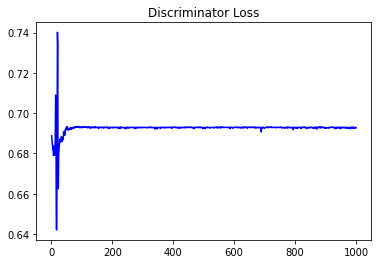

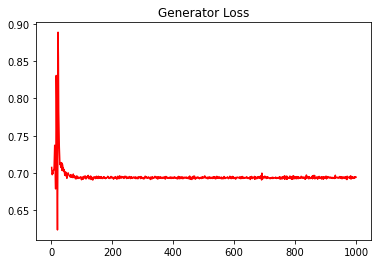

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0029496205496600133


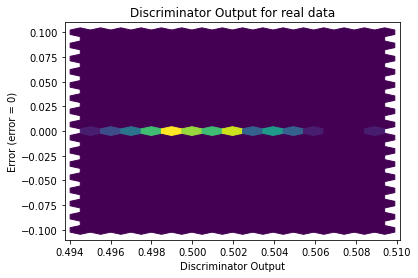

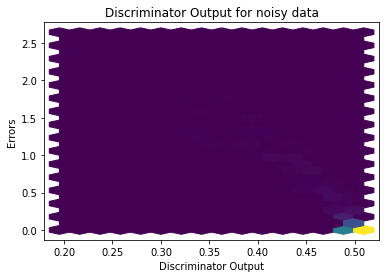

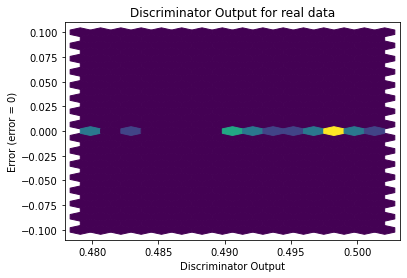

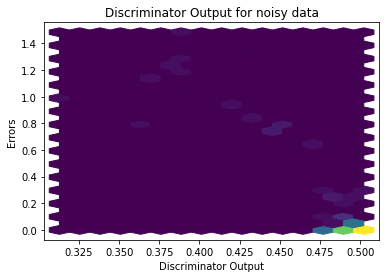

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


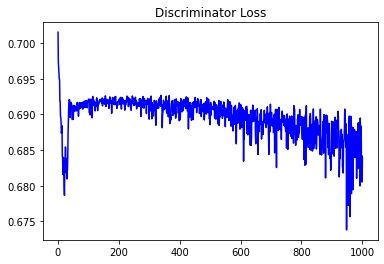

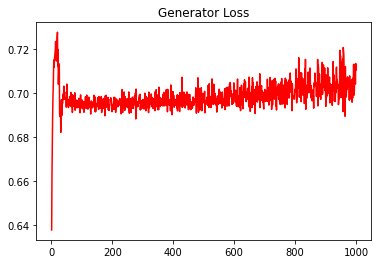

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0069255645051440155


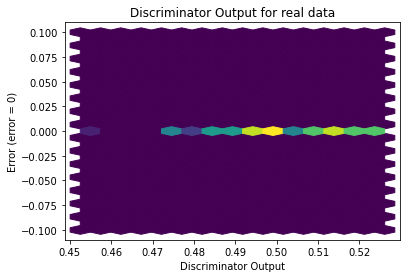

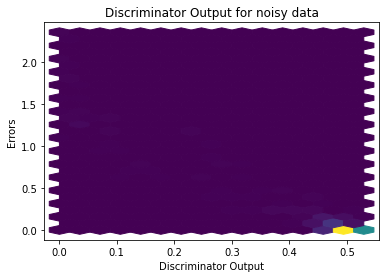

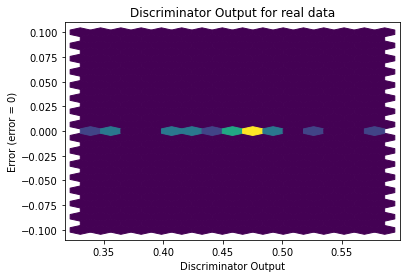

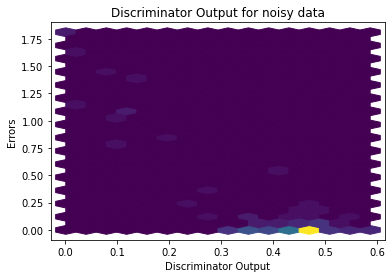

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1258]], requires_grad=True)
